In [2]:
import pylab as p
import tangos
import numpy as np
import matplotlib.pyplot as plt
import pynbody
import matplotlib as mat
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph
import scipy

### Load in the Superbubble and Blastwave runs of the Storm simulation

In [5]:
s = pynbody.load(f"/myhome2/users/munshi/dwarf_volumes/storm.cosmo25cmb.4096g1HsbBH/storm.cosmo25cmb.4096g1HsbBH.004096")
h = s.halos(dosort=True)
s.physical_units()
storm_sb = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 20, 22, 23, 24, 36, 76]

s_storm = pynbody.load(f"/myhome2/users/munshi/dwarf_volumes/storm.cosmo25cmb.4096g5HbwK1BH/storm.cosmo25cmb.4096g5HbwK1BH.004096/storm.cosmo25cmb.4096g5HbwK1BH.004096")
h_storm = s_storm.halos()
s_storm.physical_units()

storm_bw = [1,2,3,4,5,6,7,8,10,11,12,14,15,22,23,31,37,44,48,55,118]

### Create list of resolved halos

In [ ]:
### Mass cut
bw_starpart = []
for x in range(0,len(h_storm)):
    try:
        if len(h_storm[x].star) >13:
            print(x)
            bw_starpart.append(x)
    except ValueError:
        continue
### SFH time cut
resolved_bw = []
for x in bw_starpart:
    print(x)
    Tform = abs(h_storm[x].star['tform'].in_units("Myr"))
    Dt = Tform.max()-Tform.min()
    print(Dt)
    if Dt > 100:
        resolved_bw.append(x)

sb_starpart = []
for x in range(0,len(h)):
    try:
        if len(h[x].star) >13:
            print(x)
            sb_starpart.append(x)
    except ValueError:
        continue
resolved_sb = []
for x in sb_starpart:
    print(x)
    Tform = abs(h[x].star['tform'].in_units("Myr"))
    Dt = Tform.max()-Tform.min()
    print(Dt)
    if Dt > 100:
        resolved_sb.append(x)

### Calculate Halo Properties

In [3]:
### Stellar Mass and Halo Mass

MstarSB = []
MvirSB = []
for i in storm_sb:
    MstarSB.append(np.sum(h[i].star['mass']))
    MvirSB.append(np.sum(h[i]['mass']))

MstarBW = []
MvirBW = []
for i in storm_bw:
    MstarBW.append(np.sum(h_storm[i].star['mass']))
    MvirBW.append(np.sum(h_storm[i]['mass']))

In [ ]:
### Half Light Radius

Rh_SB = []
for i in storm_sb:
    print(i)
    halo = h[i]
    pynbody.analysis.angmom.faceon(halo)
    L = pynbody.analysis.luminosity.half_light_r(halo, band='v', cylindrical=False)
    Rh_SB.append(L)

Rh_BW = []
for i in storm_bw:
    print(i)
    halo = h_storm[i]
    pynbody.analysis.angmom.faceon(halo)
    L = pynbody.analysis.luminosity.half_light_r(halo, band='v', cylindrical=False)
    Rh_BW.append(L)

In [ ]:
### V-Band stellar luminosity

Lv_SB = []
for x in storm_sb: 
    L = pynbody.analysis.luminosity.halo_lum(h[x], band='v')
    Lv_SB.append(L)

Lv_BW = []
for x in storm_bw: 
    L = pynbody.analysis.luminosity.halo_lum(h_storm[x], band='v')
    Lv_BW.append(L)

In [ ]:
### Average stellar metallicity

FeH_SB = []
for i in storm_sb:
    FEH = np.mean(h[i].star['feh'])
    FeH_SB.append(FEH)
    
FeH_BW = []
for i in storm_bw:
    FEH = np.mean(h_storm[i].star['feh'])
    FeH_BW.append(FEH)

### Calculate Gas Phase Metallicity

In [ ]:
### Superbubble Run
#sorted halo ID array, matching halo center array, matching Rvir array, matching Mstar array
hnum_iso_only2k = storm_sb
cen_iso_only2k = []
rvir_iso_only2k = []
Mstar_iso_only2k = []
for i in storm_sb: 
    halo = h[i]
    cen = pynbody.analysis.halo.shrink_sphere_center(halo, r=None, shrink_factor=0.7, min_particles=100, verbose=False, num_threads=8)
    cen_iso_only2k.append(cen)
    Mstar_iso_only2k.append(np.sum(halo.s['mass']))
for i in storm_sb:
    halo = h[i]
    pynbody.analysis.angmom.faceon(halo)
    rvir = pynbody.analysis.halo.virial_radius(halo, cen=None, overden=178, r_max=None, rho_def='matter')
    rvir_iso_only2k.append(rvir)
np.savetxt("MZmstarsb",Mstar_iso_only2k, delimiter=',')
np.savetxt("MZrvirsb",rvir_iso_only2k, delimiter=',')
np.savetxt("MZcensb",cen_iso_only2k, delimiter=',')
np.savetxt("MZhnumsb",hnum_iso_only2k, delimiter=',')

In [10]:
###Blastwave Run   
#sorted halo ID array, matching halo center array, matching Rvir array, matching Mstar array
hnum_iso_only2k = storm_bw
cen_iso_only2k = []
rvir_iso_only2k = []
Mstar_iso_only2k = []
for i in storm_bw: 
    halo = h_storm[i]
    cen = pynbody.analysis.halo.shrink_sphere_center(halo, r=None, shrink_factor=0.7, min_particles=100, verbose=False, num_threads=8)
    cen_iso_only2k.append(cen)
    Mstar_iso_only2k.append(np.sum(halo.s['mass']))
for i in storm_bw:
    halo = h_storm[i]
    print(i)
    pynbody.analysis.angmom.faceon(halo)
    rvir = pynbody.analysis.halo.virial_radius(halo, cen=None, overden=178, r_max=None, rho_def='matter')
    rvir_iso_only2k.append(rvir)
np.savetxt("MZmstarbw",Mstar_iso_only2k, delimiter=',')
np.savetxt("MZrvirbw",rvir_iso_only2k, delimiter=',')
np.savetxt("MZcenbw",cen_iso_only2k, delimiter=',')
np.savetxt("MZhnumbw",hnum_iso_only2k, delimiter=',')

In [11]:
def get_MZR_arrays(s,hnum_iso_only2k,cen_iso_only2k,rvir_iso_only2k,Mstar_iso_only2k):
    print('This function selects all the cold gas in the halos from the blastwave run to calculate [0/H]')
    print('Starting loop:')
    m_h = 1.6733 * 10**-24 # g
    coldbroke = []
    densebroke = []
    coldgas_OH = np.zeros(len(hnum_iso_only2k))
    missingfile = []
    hnum = []
    x=0
    for i in hnum_bw:
        hnum.append(int(i))
    for i in hnum:
        print('Loading and getting OH for:',i)
        try:
            hg = h_storm[i].g
        except:
            print('Still need to make file.')
            missingfile.append(hnum_iso_only2k[i])
            continue
            
        hg.physical_units()
        
        if len(hg) == 0:
            print('Skipping, This galaxy has no cold gas')
            coldgas_OH[x] = np.nan
            coldbroke.append(i)
            continue
            
        coldgas = hg[hg['temp'] < 10**4] and hg[hg['rho'].in_units('Msol cm**-3')/8.34895e-58 > 0.1]
        print(coldgas)

        #### GET O/H ### for mass metallicity relation
        cold_hetot = 0.236 + (2.1 * coldgas['metals'])
        cold_hydrogen = 1.0 - coldgas['metals'] - cold_hetot
        
        try:
            coldgas_OH[x] = np.average((coldgas['OxMassFrac']/(16*m_h))/(cold_hydrogen/m_h)) #weighted average with mass
        except:
            coldgas_OH[x] = np.nan
            coldbroke.append(i)
        x=x+1
        
    return hnum_iso_only2k,Mstar_iso_only2k,coldgas_OH

In [11]:
hnum_bw = np.loadtxt("MZ/MZhnumbw", delimiter=',')
Mstar_bw = np.loadtxt("MZ/MZmstarbw", delimiter=',')
rvir_bw = np.loadtxt("MZ/MZrvirbw", delimiter=',')
cen_bw = np.loadtxt("MZ/MZcenbw", delimiter=',')
hnum_wcoldgas_bw, Mstar_wcoldgas_bw, coldgasOH_bw = get_MZR_arrays(s,hnum_bw,cen_bw,rvir_bw,Mstar_bw)

In [ ]:
def get_MZR_arrays(s,hnum_iso_only2k,cen_iso_only2k,rvir_iso_only2k,Mstar_iso_only2k):
    print('This function selects all the cold gas in the halos from the superbubble run to calculate [0/H]')
    print('Starting loop:')
    m_h  = 1.6733 * 10**-24 # g
    coldbroke = []
    densebroke = []
    coldgas_OH = np.zeros(len(hnum_sb))
    missingfile = []
    hnum = []
    x=0
    for i in hnum_sb:
        hnum.append(int(i))
    for i in hnum:
        print('Loading and getting OH for:',i)
        try:
            hg = h[i].g
        except:
            print('Still need to make file.')
            missingfile.append(hnum[i])
            continue
            
        hg.physical_units()
        
        if len(hg) == 0:
            print('Skipping, This galaxy has no cold gas')
            coldgas_OH[x] = np.nan
            coldbroke.append(i)
            continue
            
        coldgas = hg[hg['temp'] < 10**4] and hg[hg['rho'].in_units('Msol cm**-3')/8.34895e-58 > 0.1]
        print(coldgas)

        #### GET O/H ### for mass metallicity relation
        cold_hetot = 0.236 + (2.1 * coldgas['metals'])
        cold_hydrogen = 1.0 - coldgas['metals'] - cold_hetot
        
        try:
            coldgas_OH[x] = np.average((coldgas['OxMassFrac']/(16*m_h))/(cold_hydrogen/m_h)) #weighted average with mass
        except:
            coldgas_OH[x] = np.nan
            coldbroke.append(i)
        x=x+1
        
    return hnum_sb,Mstar_sb,coldgas_OH

In [ ]:
hnum_sb = np.loadtxt("MZ/MZhnumsb", delimiter=',')
Mstar_sb = np.loadtxt("MZ/MZmstarsb", delimiter=',')
rvir_sb = np.loadtxt("MZ/MZrvirsb", delimiter=',')
cen_sb = np.loadtxt("MZ/MZcensb", delimiter=',')
hnum_wcoldgas_sb, Mstar_wcoldgas_sb, coldgasOH_sb = get_MZR_arrays(s,hnum_sb,cen_sb,rvir_sb,Mstar_sb)

In [ ]:
np.savetxt("MZmstar_wcoldgas_sb",Mstar_wcoldgas_sb, delimiter=',')
np.savetxt("MZcoldgas_sb",coldgasOH_sb, delimiter=',')
np.savetxt("MZmstar_wcoldgas_bw",Mstar_wcoldgas_bw, delimiter=',')
np.savetxt("MZcoldgas_bw",coldgasOH_bw, delimiter=',')

### Core-Einasto Slope Calculation

In [8]:
def CoreRadius (alpha_1, alpha_2, x, x_1,  x_2, beta_1, gamma_1):
    return(10**alpha_1*((alpha_2 + (x/x_1))**(-beta_1))*((x/x_2)**gamma_1))

def s_radius(r_2, x, x_3, x_4, beta_2, BETA, gamma_2):
    return(r_2*((1+x/x_3)**-beta_2)+(BETA*(x/x_4)**gamma_2))

def S_CoreEinasto(r,rho_s,r_s,r_c,a, x, y0):
    return( x * rho_s*np.exp(-(2/a)*(((r+r_c)/r_s)**a-1)) + y0)
### could also multiply x by a random interger that is a good guess for the slope that you are calculating (between -1 and 0)

###Need to make sure that this code is changed if you're switching between simulations, set halo=sim_halo
def CoreEinasto(S_CoreEinasto, halo, core_rad):
    halo=halo
    pynbody.analysis.angmom.faceon(halo)
    if core_rad > 10:
        prof = pynbody.analysis.profile.Profile(halo.dm, vmin =.25, max=core_rad, ndim=3)
    else:
        prof = pynbody.analysis.profile.Profile(halo.dm, vmin =.25, max=10, ndim=3)
    if RADIUS > 1:
        N = (prof['rbins'] < RADIUS).sum()
    else:
        N = (prof['rbins'] < 1).sum()
    x,y = np.log10(prof['rbins'][:N+1]),np.log10(prof['density'][:N+1])
    y[np.isneginf(y)] = 0.1
    par,err = scipy.optimize.curve_fit(S_CoreEinasto,x,y)
    x_in = np.log10(prof['rbins'][:N+1][(prof['rbins'][:N+1]<par[2])])
    y_in = np.log10(prof['density'][:N+1][(prof['rbins'][:N+1]<par[2])])
    y_in[np.isneginf(y_in)] = 0.1
    if len(x_in) > 0:
        line =  np.polyfit(x_in,y_in,1)
    else:
        x_in = np.log10(prof['rbins'][:N+1])
        y_in = np.log10(prof['density'][:N+1])
        y_in[np.isneginf(y_in)] = 0.1
        line =  np.polyfit(x_in,y_in,1)
    return(line)

<ipython-input-8-0f7dd68f95d6>:8: RuntimeWarning: invalid value encountered in power
  return( x * rho_s*np.exp(-(2/a)*(((r+r_c)/r_s)**a-1)) + y0)


-0.1656744739486919


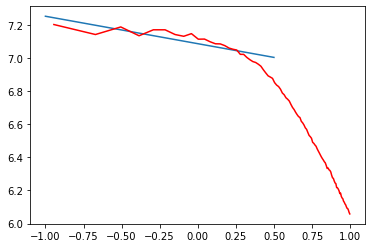

In [10]:
###Select a halo to perform analysis on
h_ID = 1
###Need to make sure that this code is changed if you're switching between simulations, set halo=sim_halo
halo = h[h_ID]

###Find the value of the core radius
a = 0.16
Mstar = np.sum(halo.star['mass'])
Mhalo = np.sum(halo['mass'])
Xmsmh = Mstar/Mhalo
r_c = CoreRadius(1.21, 0.71, Mstar/Mhalo, 7.2*1e-3, 0.011, 2.31, 1.55)
r_c = float(r_c)

###Set Max Radius
pynbody.analysis.angmom.faceon(halo)
Rvir = pynbody.analysis.halo.virial_radius(halo, cen=None, overden=178, r_max=None, rho_def='matter')
r = Rvir
if r < 10:
    RADIUS = r
else:
    RADIUS = 10

###Find R_2 value
p = pynbody.analysis.profile.Profile(halo.dm, vmin =.01, max=10, ndim=3)
for i in range(len(p['rbins'])):
    x1 = np.log10(p['rbins'][i]/Rvir)
    x2 = np.log10(p['rbins'][i+1]/Rvir)
    y1 = np.log10(p['density'][i])
    y2 = np.log10(p['density'][i+1])
    m = (y1-y2)/(x1-x2)
    if m < -2:
        r_2 = p['rbins'][i]
        break
        
###Find R_s
r_s = s_radius(r_2, Mstar/Mhalo, 0.044, 0.28, 31.79, 1.51, 0.40)

###Find Rho_s value, relies on R_s calculation
low = []
high = []
for i in range(len(p['rbins'])): 
    if r_s >= p['rbins'][i]:
        low.append(p['rbins'][i])
    else:
        high.append(p['rbins'][i])
z = len(low)-1
try:
    Lval = max(low)
    Hval = min(high)
    Ldiff = r_s - Lval
    Hdiff = Hval - r_s
    if Ldiff < Hdiff:
        rho_s = p['density'][z]
    else:
        rho_s = p['density'][z+1]
except:
    ValueError
    rho_s = p['density'][0]

Xmsmh = Mstar/Mhalo
x,y = np.log10(p['rbins']),np.log10(p['density'])
y0 = y[0]
S_CoreEinasto(r,rho_s,r_s,r_c,a,x, y0)

Core_ES = CoreEinasto(S_CoreEinasto, halo, r_c)

###Spits out the slope and intercept of the linear fit, core_slope is the 0th value in the array (in logscale)
print(Core_ES[0])

###Visual check to make sure that the core_slope fit matches the density profile
x = np.linspace(-1, 0.5, 100)
y = x*Core_ES[0] + Core_ES[1]
plt.plot(x,y)
pynbody.analysis.angmom.faceon(halo)
prof = pynbody.analysis.profile.Profile(halo.dm, vmin =.01, max=10, ndim=3)
x1,y1 = np.log10(prof['rbins']),np.log10(prof['density'])
plt.plot(x1,y1, c='red')

### Calculate Core-slope through time

In [9]:
time_steps = ["004096","004032","003936","003840","003744","003648","003552","003456","003360","003264","003168","003072","002976","002880","002784","002688","002592","002496","002400","002304","002208","002112","002016","001920","001824","001728","001632","001536","001440","001344","001248","001152","001056","000960","000864","000768","000672","000576","000480","000384"]

###Halo IDs at earlier Timesteps in BW run
halo1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,29]
halo2 = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,5,7,8,11,11,11,10,14,12,4]
halo3 = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,4,5,5,5,4,4,4,3,4,4,3,7,14,7]
halo4 = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,4,3,3,2,2,2,2,2,4,10,10,12,11,6,9]
halo5 = [5,5,5,5,5,5,5,6,6,5,5,5,5,5,5,5,5,5,5,5,6,6,7,6,6,7,7,7,7,7,7,6,6,6,8,9,18,21,20,22]
halo6 = [6,6,6,6,6,6,6,5,5,6,6,6,7,9,10,10,10,10,9,9,9,11,11,11,10,10,9,8,11,16,15,16,17,20,17,17,17,17,25,28]
halo7 = [7,8,8,8,8,8,9,10,10,9,9,10,9,8,9,8,8,8,8,8,8,8,10,10,9,11,10,10,9,10,10,11,10,10,9,8,7,3,1,5]
halo8 = [8,7,7,7,7,7,7,7,7,8,8,8,10,10,7,6,6,6,10,10,11,12,12,12,11,12,11,11,10,11,11,10,9,9,7,7,6,5,3,3]
halo10 = [10,10,10,10,9,9,10,9,9,11,11,11,11,11,11,11,11,13,15,17,16,17,18,18,18,17,19,19,18,19,18,19,19,21,26,29,53,46,41,41]
halo11 = [11,11,11,12,12,12,12,12,12,12,12,12,12,13,12,13,13,12,13,13,14,14,14,14,14,14,14,12,12,13,22,26,26,18,22,27,41,120,286,327]
halo12 = [12,12,12,13,13,13,13,13,13,13,13,13,13,12,13,12,12,11,12,12,12,13,13,13,12,13,13,13,13,9,9,8,11,12,13,16,16,22,35,34]
halo14 = [14,14,13,14,14,15,15,15,15,15,15,15,15,15,15,15,14,15,14,15,15,16,17,17,17,16,18,17,17,17,17,17,16,16,15,14,15,16,17,14]
halo15 = [15,15,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,17,17,19,22,22,23,22,23,22,22,22,21,20,20,22,22,22,21,21,24,26,23,16]
halo22 = [22,21,20,21,21,22,22,22,23,24,25,24,24,25,25,24,24,23,25,26,27,27,29,29,27,28,27,27,27,27,27,28,31,34,34,33,33,32,32,45,]
halo23 = [23,23,22,22,22,24,24,24,25,25,26,25,26,28,27,26,26,27,30,31,32,32,32,31,28,29,28,33,30,33,33,34,28,30,28,26,25,29,31,24]
halo31 = [31,30,27,27,28,27,26,25,24,22,22,21,20,19,19,19,19,18,18,21,19,18,16,15,15,18,17,14,14,12,12,13,14,15,14,15,14,12,11,25]
halo37 = [37,36,37,40,43,38,33,31,31,32,35,34,35,34,33,31,32,32,35,35,36,36,35,34,32,30,30,32,41,44,44,46,43,57,43,57,53,72,62,196]
halo44 = [44,44,43,43,45,45,45,45,45,49,53,52,54,54,52,54,52,51,52,51,51,51,52,52,52,51,52,55,56,55,52,55,56,54,55,51,47,39,38,42]
halo48 = [48,48,49,49,55,55,57,57,57,61,62,61,60,61,61,64,65,66,69,67,65,68,66,68,70,70,74,74,75,76,73,76,76,81,79,79,83,82,91,75]
halo55 = [55,54,56,52,51,51,48,46,46,48,52,50,52,50,49,52,53,52,53,52,52,53,53,54,54,53,56,59,58,56,58,58,60,59,48,40,48,64,68,69]
halo118 = [118,118,120,118,121,124,126,125,124,121,114,97,93,95,83,63,63,61,59,58,58,62,64,66,68,66,67,64,54,48,229,75,47,58,62,64,64,53,54,60]

###Halo IDs at earlier Timesteps in SB run
halo1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1]
halo2 = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,3,2,3,3,2,3,10,3]
halo3 = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,4,4,4,4,4,13,20,11]
halo4 = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,3,2,2,3,5,8,7,11,8,5]
halo5 = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,7,10,11,11,10,10,11,11,11,11,10,11,11,11,10,9,8,6,6,5,3,5]
halo6 = [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,8,10,11,11,20,18,13,12]
halo7 = [7,7,7,7,7,7,7,7,7,7,7,7,7,10,11,11,10,11,11,11,10,10,11,11,10,10,10,10,11,15,14,15,16,17,15,17,16,15,21,19]
halo8 = [8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,8,8,8,8,7,7,7,7,7,8,8,9,9,9,9,9,10,9,7,6,5,5,4,2,4]
halo10 = [10,10,10,10,10,10,10,10,8,10,10,10,11,11,10,10,11,12,14,15,17,17,18,18,17,18,18,18,18,18,18,18,18,18,18,29,52,48,39,41]
halo11 = [11,11,11,12,11,11,11,11,12,11,12,12,12,13,13,14,14,14,13,14,13,14,14,14,13,15,14,14,14,13,20,23,21,16,23,27,34,99,49,72]
halo12 = [12,12,12,13,12,12,12,12,13,12,13,13,13,12,12,13,13,13,12,12,12,12,13,13,12,12,13,13,12,10,10,9,11,11,13,15,15,36,32,28]
halo14 = [14,14,13,14,13,14,14,14,15,14,15,15,15,15,16,16,15,16,16,16,16,16,17,17,16,17,17,16,16,16,15,16,15,13,14,13,14,14,11,9]
halo16 = [16,16,14,16,15,16,15,15,16,15,16,16,17,17,18,17,17,18,18,20,21,23,23,23,23,21,22,22,22,20,22,22,22,21,21,22,22,22,19,13]
halo20 = [20,20,19,20,19,19,19,19,19,18,19,19,19,20,21,21,21,22,23,241,26,26,27,27,29,28,28,33,34,31,34,38,47,87,67,28,26,31,37,32]
halo22 = [22,22,21,22,21,22,22,22,23,23,25,27,27,29,34,34,32,33,35,35,36,37,39,40,40,40,42,46,52,48,49,51,67,76,79,55,56,53,59,60]
halo23 = [23,23,22,23,22,23,23,241,25,22,23,23,241,25,25,25,25,25,28,27,28,29,29,28,26,26,26,26,26,26,27,27,31,33,33,34,32,33,28,43]
halo24 = [24,241,23,241,23,241,25,25,26,241,241,25,25,26,26,26,27,27,30,30,31,32,31,32,31,30,30,32,31,30,31,32,27,27,26,25,23,23,23,20]
halo36 = [36,36,34,35,37,37,36,36,36,35,37,40,38,43,43,42,40,45,46,44,46,46,47,47,48,46,45,44,44,46,47,48,53,51,52,49,48,42,42,37]
halo76 = [76,76,77,76,76,73,66,66,72,82,84,89,88,89,93,95,98,97,97,100,99,97,98,100,91,92,96,95,100,99,101,114,52,54,51,49,183,52,30,29]


In [ ]:
### Calculate core-slopes in Blastwave run of Storm at earlier timesteps
All_Halos = [halo1,halo2,halo3,halo4,halo5,halo6,halo7,halo8,halo10,halo11,halo12,halo14,halo15,halo22,halo23,halo31,halo37,halo44,halo48,halo55,halo118]
slopes = []
ID = 0
SLOPE = []
for timestep in time_steps:
    s = pynbody.load(f"/myhome2/users/munshi/dwarf_volumes/storm.cosmo25cmb.4096g5HbwK1BH/storm.cosmo25cmb.4096g5HbwK1BH." + timestep + "/storm.cosmo25cmb.4096g5HbwK1BH." + timestep)
    h = s.halos()
    s.physical_units()
    SLOPE = []
    for halo_list in All_Halos:
        h_ID = halo_list[ID]
        h_ID = int(h_ID)
        halo = h[h_ID]
    ###Find the value of the core radius
        a = 0.16
        Mstar = np.sum(halo.star['mass'])
        Mhalo = np.sum(halo['mass'])
        Xmsmh = Mstar/Mhalo
        r_c = CoreRadius(1.21, 0.71, Mstar/Mhalo, 7.2*1e-3, 0.011, 2.31, 1.55)
    ###Set Max Radius
        try:
            pynbody.analysis.angmom.faceon(halo)
            Rvir = pynbody.analysis.halo.virial_radius(halo, cen=None, overden=178, r_max=None, rho_def='matter')
            r = Rvir
        except ValueError:
            Rvir = 10
        if r_c > 1:
            RADIUS = r_c
        else:
            RADIUS = 1
    ###Find R_2 value
        pynbody.analysis.angmom.faceon(halo)
        p = pynbody.analysis.profile.Profile(halo.dm, vmin =.01, max=10, ndim=3)
        for i in range(len(p['rbins'])):
            x1 = np.log10(p['rbins'][i]/Rvir)
            x2 = np.log10(p['rbins'][i+1]/Rvir)
            y1 = np.log10(p['density'][i])
            y2 = np.log10(p['density'][i+1])
            m = (y1-y2)/(x1-x2)
            if m < -2:
                r_2 = p['rbins'][i]
                break    
    ###Find R_s
        r_s = s_radius(r_2, Mstar/Mhalo, 0.044, 0.28, 31.79, 1.51, 0.40)
    ###Find Rho_s value, relies on R_s calculation
        low = []
        high = []
        for i in range(len(p['rbins'])): 
            if r_s >= p['rbins'][i]:
                low.append(p['rbins'][i])
            else:
                high.append(p['rbins'][i])
        z = len(low)-1
        try:
            Lval = max(low)
            Hval = min(high)
            Ldiff = r_s - Lval
            Hdiff = Hval - r_s
            if Ldiff < Hdiff:
                rho_s = p['density'][z]
            else:
                rho_s = p['density'][z+1]
        except:
            ValueError
            rho_s = p['density'][0]
        Xmsmh = Mstar/Mhalo
        x,y = np.log10(p['rbins']),np.log10(p['density'])
        y0 = y[0]
        S_CoreEinasto(r,rho_s,r_s,r_c,a,x, y0)
        try:
            Core_ES = CoreEinasto(S_CoreEinasto, halo)
            SLOPE.append(Core_ES[0])
        except ValueError:
            SLOPE.append(-10)
    ID += 1
    slopes.append(SLOPE)
    np.savetxt("blastwave_slopes.1",slopes, delimiter=',')

In [ ]:
### Calculate core-slopes in Superbubble run of Storm at earlier timesteps
All_Halos = [halo1,halo2,halo3,halo4,halo5,halo6,halo7,halo8,halo10,halo11,halo12,halo14,halo16,halo20,halo22,halo23,halo24,halo36,halo76]
slopes = []
ID = 0
for timestep in time_steps:
    s = pynbody.load(f"/myhome2/users/munshi/dwarf_volumes/storm.cosmo25cmb.4096g1HsbBH/storm.cosmo25cmb.4096g1HsbBH." + timestep)
    h = s.halos(dosort=True)
    s.physical_units()
    SLOPE = []
    for halo_list in All_Halos:
        h_ID = halo_list[ID]
        h_ID = int(h_ID)
        halo = h[h_ID]
    ###Find the value of the core radius
        a = 0.16
        Mstar = np.sum(halo.star['mass'])
        Mhalo = np.sum(halo['mass'])
        Xmsmh = Mstar/Mhalo
        r_c = CoreRadius(1.21, 0.71, Mstar/Mhalo, 7.2*1e-3, 0.011, 2.31, 1.55)
    ###Set Max Radius
        try:
            pynbody.analysis.angmom.faceon(halo)
            Rvir = pynbody.analysis.halo.virial_radius(halo, cen=None, overden=178, r_max=None, rho_def='matter')
            r = Rvir
        except ValueError:
            Rvir = 10  
        if r_c > 1:
            RADIUS = r_c
        else:
            RADIUS = 1
    ###Find R_2 value
        p = pynbody.analysis.profile.Profile(halo.dm, vmin =.01, max=10, ndim=3)
        for i in range(len(p['rbins'])):
            x1 = np.log10(p['rbins'][i]/Rvir)
            x2 = np.log10(p['rbins'][i+1]/Rvir)
            y1 = np.log10(p['density'][i])
            y2 = np.log10(p['density'][i+1])
            m = (y1-y2)/(x1-x2)
            if m < -2:
                r_2 = p['rbins'][i]
                break
    ###Find R_s
        r_s = s_radius(r_2, Mstar/Mhalo, 0.044, 0.28, 31.79, 1.51, 0.40)
    ###Find Rho_s value, relies on R_s calculation
        low = []
        high = []
        for i in range(len(p['rbins'])): 
            if r_s >= p['rbins'][i]:
                low.append(p['rbins'][i])
            else:
                high.append(p['rbins'][i])
        z = len(low)-1
        try:
            Lval = max(low)
            Hval = min(high)
            Ldiff = r_s - Lval
            Hdiff = Hval - r_s
            if Ldiff < Hdiff:
                rho_s = p['density'][z]
            else:
                rho_s = p['density'][z+1]
        except:
            ValueError
            rho_s = p['density'][0]
        Xmsmh = Mstar/Mhalo
        x,y = np.log10(p['rbins']),np.log10(p['density'])
        y0 = y[0]
        S_CoreEinasto(r,rho_s,r_s,r_c,a,x, y0)
        try:
            Core_ES = CoreEinasto(S_CoreEinasto, halo)
            SLOPE.append(Core_ES[0])
            print(Core_ES[0])
        except ValueError:
            SLOPE.append(-10)
    ID += 1
    slopes.append(SLOPE)
    np.savetxt("superbubble_slopes.1",slopes, delimiter=',')